#### CHAPTER 4
# 모델 훈련

1. 선형 회귀
2. 경사 하강법
3. 다항 회귀
4. 학습 곡선
5. 규제가 있는 선형 모델
6. 로지스틱 회귀


## 들어가며

*선형회귀*
- 훈련 방법
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구함
2. 경사 하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화 시킴
    - 1번의 방법과 동일한 파라미터로 수렴
    - 경사 하강법의 변조으로 신경망을 공부할 때 계속 사용하게 될 배치(batch) 경사 하강법, 미니 배치 경사 하강법, 확률적(stochastic) 경사 하강법도 살펴봄
    
*다항 회귀*
- 비선형 데이터셋에 훈련시킬 수 있는 모델
- 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합되기 더 쉬움
- 학습 곡선(learning curve)을 사용해 모델이 과대적합 되는지 감지 방법 탐색
- 훈련 세트의 과대적합을 감소시키는 규제 기법 탐색

*로지스틱 회귀&소프트맥스 회귀*
- 분류 작업에 널리 사용하는 모델

## 선형 회귀

- 일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(bias/ 절편intercept) 상수를 더하여 예측을 만듦<br>
#### 선형 회귀 모델의 예측
![n1](https://miro.medium.com/max/700/1*jOjxZ5g0RFJN0PqdR-G-Ug.png)

#### 선형 회귀 모델의 예측.vector form 
![n2](https://sakai.unc.edu/access/content/group/2842013b-58f5-4453-aa8d-3e01bacbfc3d/public/Ecol562_Spring2012/images/lectures/lecture1/system.gif)

#### RMSE(평균 제곱근 오차)
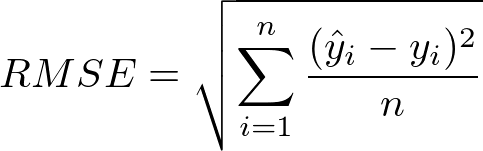
- 회귀에서 가장 널리 사용되는 성능 측정 지표
- 선형 회귀 모델을 훈련 -> RMSE 최소화 하는 theta 찾아야 함

#### MSE(평균 제곱 오차)
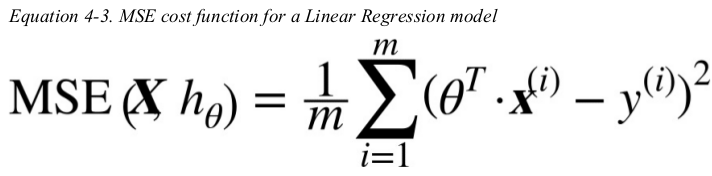
- RMSE를 최소화 하는 것과 같은 결과를 냄
- RMSE보다 더 간단함

In [5]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [1]:
#정규방정식
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

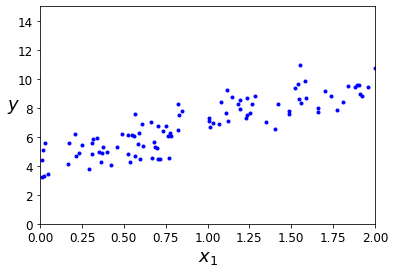

In [4]:
#무작위로 생성한 선형 데이터셋
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

#### 정규방정식
![n5](https://blog.kakaocdn.net/dn/b1uKlY/btqRI8lMktF/b8TUjusHusC8sO47kOplk1/img.png)
theta_hat: 비용함수를 최소화하는 theta 값 <br>
y: y(1)~y(m)까지 포함하는 타깃 벡터

In [5]:
#inv(): 역행렬 계산
#dot(): 행렬 곱셈
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
#4와 3 기대
theta_best #잡음때문에 원래 함수의 파라미터를 정확하게 재현하지 못함

array([[4.13890336],
       [2.86191376]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13890336],
       [9.86273087]])

In [8]:
#예측 진행
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13890336],
       [9.86273087]])

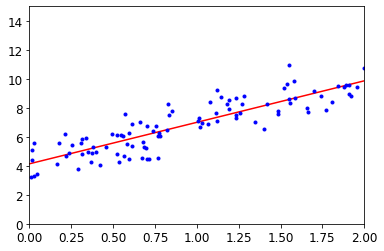

In [9]:
#모델의 예측 그리기
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

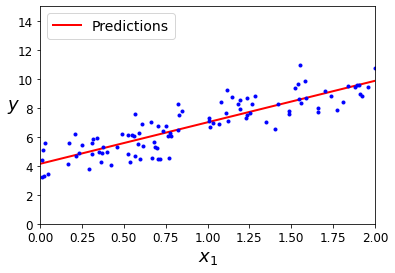

In [10]:
#범례와 축 레이블 추가
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
#save_fig("linear_model_predictions_plot")
plt.show()

In [11]:
#사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13890336]), array([[2.86191376]]))

In [12]:
lin_reg.predict(X_new)

array([[4.13890336],
       [9.86273087]])

In [13]:
'''LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 
이 함수를 직접 사용할 수 있다'''
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.13890336],
       [2.86191376]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있습니다:



In [14]:
#유사 역행렬 계산
np.linalg.pinv(X_b).dot(y)

array([[4.13890336],
       [2.86191376]])

- 유사 역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용하여 계산
- SVD는 훈련 세트 행렬 $\mathbf{X}$를 3개의 행렬 곱셈으로 분해
- 유사역행렬은 아래 그림으로 계산됨
- ![aa](https://sunshower76.github.io/public/img/2019-08-06-linear%20algebra-lecture33/img02.png)
-  정규방적식을 계산하는 것보다 훨씬 효율적이며, 행렬이 특이 행렬이라면 정규방적식은 작동하지 않짐나 유사역행렬은 언제나 구할 수 있음

- 선형 회귀 모델은 예측이 매우 빠름 - 예측 계산 복잡도는 샘플 수와 특성 수에 선형적

## 경사 하강법

- 여러 종류의 문제에서 최적의 해답을 찾을 수 있는 일반적인 최적화 알고리즘
- 비용 함수를 최소화하기 위해 반복해서 파라미터 조정
- 비용함수가 감소되는 방향으로 진행하여 그레이디언트가 0이 되는 최소값에 수렴할 때까지 점진적으로 향상시킴
<br>

![mm](https://hwk0702.github.io/img/gradient.png)

- 경사 하강법에서 중요한 파라미터, 스텝의 크기 = 학습률
    - 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
    - 학습률이 너무 높으면 알고리즘을 더 큰 값으로 발산하게 만들어 해법을 찾지 못함

![nm](https://yganalyst.github.io/assets/images/ML/chap3/gd3.png)
- 경사 하강법의 문제점
    - 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값 보다 덜 좋은 지역 최솟값에 수렴함
    - 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 최솟값에 도달하지 못함


- 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수
- 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻
- 경사 하강법이 전역 최솟값에 가깝게 접근 할 수 있음
- 모델 훈련은 비용 함수를 최소화 하는 모델 파라미터의 조합을 찾는 일로 이를 모델의 파라미터 공간에서 찾는다고 말함

**배치 경사 하강법**
- 매 스텝에서 전체 훈련 세트를 사용하여 그레이디언트를 계산
- 경사 하강법을 구현하려면 각 모델 파라미터 theta에 대해 비용 함수의 그레이디언트를 계산해야 함
- theta가 조금 변경될 때마다 비용 함수가 얼마나 바뀌는지 계산해야 함 => 편도함수

#### 비용함수의 그레이디언트 벡터
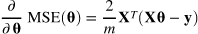

#### 경사 하강법의 스텝
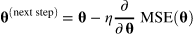

In [15]:
#경사 하강법의 스텝 알고리즘 구현
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.13890336],
       [2.86191376]])

- 정규 방정식으로 찾은 것과 같음

In [17]:
#정규 방정식
X_new_b.dot(theta)

array([[4.13890336],
       [9.86273087]])

**배치 경사 하강법을 사용한 선형 회귀**

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

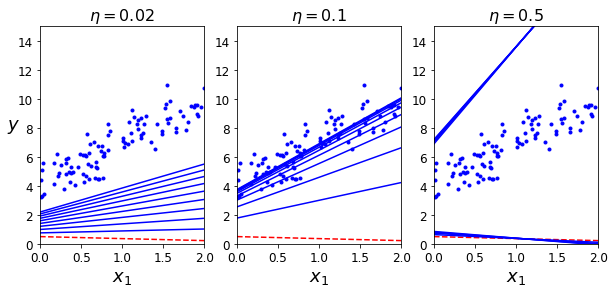

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) #학습률 =0.02
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd) #학습률 =0.1
plt.subplot(133); plot_gradient_descent(theta, eta=0.5) #학습률 =0.5

#save_fig("gradient_descent_plot")
plt.show()

- 왼쪽은 학습률이 너무 낮고(최적점 도달까지의 시간이 오래걸림), 오른쪽은 학습률이 너무 높음(발산)
- 적절한 학습률을 찾기 => 그리드 탐색 사용 + 반복 횟수 제한
- 반복 획수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 허용오차 보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지함

**확률적 경사 하강법**
- 매 스텝에서한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산함
- 따라서 매우 큰 훈련 세트도 훈련시킬 수 있음
- 단 확률적이므로 배치 경사 하강법 보다 불안정함
- 따라서 학습률을 점진적으로 감소시켜 알고리즘이 전역 최솟값에 도달하게 함
- *학습 스케줄: 매 반복에서 학습률을 결정하는 함수*

In [21]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

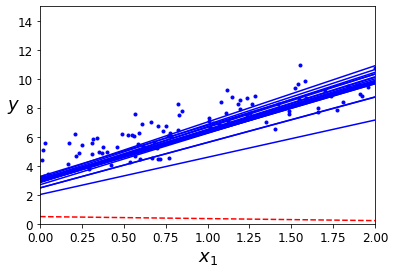

In [22]:
#확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                               
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                             
#save_fig("sgd_plot")                                 
plt.show()

- 위 그래프는 훈련 스텝의 첫 20개를 보여줌(스텝이 불규칙하게 진행) 
- 일반적으로 한 반복에서 m번 되풀이 됨
- 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달함

In [23]:
theta

array([[4.09220206],
       [2.87628233]])

In [24]:
#SGD 방식 선형 회귀
#기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor class
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42) #한 에포크에서 0.001보다 적데 손실이 줄어들때까지 반복
sgd_reg.fit(X, y.ravel()) # penalty=None: 규제는 하지 않음

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [25]:
#정규방정식으로 구한 값과 비슷한 값
sgd_reg.intercept_, sgd_reg.coef_

(array([4.07806384]), array([2.80698887]))

**미니배치 경사 하강법**
- 미니 배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함
- 행렬 연산에 최적화된 GPU를 통해 성능 향상을 얻음

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [29]:
theta

array([[4.04134697],
       [2.7636869 ]])

In [30]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

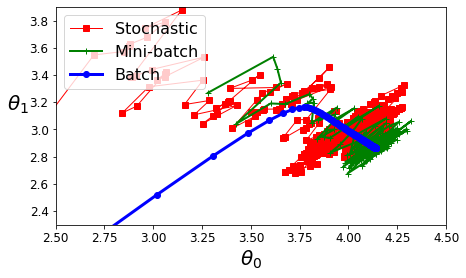

In [31]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

- 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로
- 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있음

#### 선형 회귀를 사용한 알고리즘 비교
![das](https://t1.daumcdn.net/cfile/tistory/99DE13425B4A03B00A)
- 이 알고리즘들은 훈련 결과에 거의 차이가 없음
- 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측함

## 다항 회귀
- 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [1]:
#다항 회귀 예시
#2차방정식의 비선형 데이터 생성
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

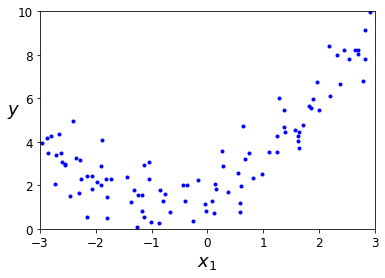

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

- 노이즈가 포함된 비선형 데이터셋
- 직선은 이 데이터에 잘 맞이 않음을 알 수 있음

In [6]:
#사이킷런의 PolynomialFeatures를 사용하여 훈련 데이터를 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) #훈련세트에 있는 각 특성을 제곱, 새로운 특성 추가
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [7]:
X_poly[0] #원래 특성 X와 이 특성의 제곱을 포함

array([-0.75275929,  0.56664654])

In [9]:
#확장된 훈련 데이터에 LinearRegression 적용
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

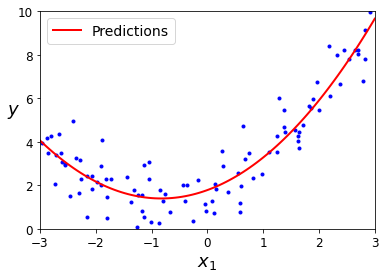

In [10]:
#다항 회귀 모델 예측
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

- 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음

## 학습 곡선
- 모델이 데이터에 과대적합 또는 과소적합 되었는지 알 수 있는 그래프
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
- 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련 시키면 됨

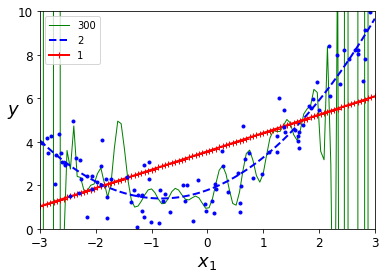

In [11]:
#주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수 정의
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

In [12]:
# 단순 선형 회귀 모델(직선)의 학습 곡선
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)            

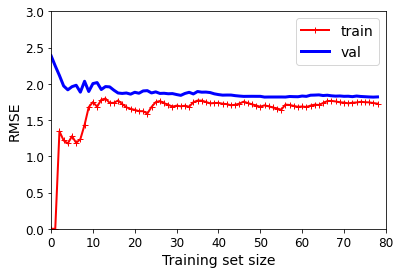

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                       
#save_fig("underfitting_learning_curves_plot")   
plt.show()             

- 과소적합 모델의 전형적인 모습
- 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동
- 하지만 훈련 세트에 샘플이 추가됨에 따라 노이즈도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해짐
- 그래서 어느 정도 평편해질 때까지 오차가 계속 상승

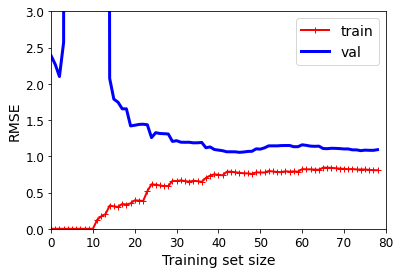

In [14]:
#10차 다항 회위 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
#save_fig("learning_curves_plot")  
plt.show()                        

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 공간이 있음
- 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻으로, 이는 과대적합 모델의 특징

*편향/분산 트에이드오프*
- 모델의 일반화 오차ㅣ는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다
- 편향
    잘못된 가정으로 인한 것
    편향이 큰 모델은 훈련 데이터에 과소적합되기 쉬움
    Ex. 데이터가 실제로 2차인데 선형으로 가정

- 분산
    훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남
    자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향

- 줄일 수 없는 오차
    데이터 자체에 있는 노이즈 때문에 발생
    오차를 줄이기 위해서는 데이터에서 노이즈를 제거하는 것
    Ex. 고장난 센서 같은 데이터 소스를 고치거나 이상치를 감지해 제거함
    
**모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 그래서 트레이드 오프라고 부른다**    


## 규제가 있는 선형 모델
- 과대적합을 감소시키는 방법: 모델 규제

*선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 각기 다른 방법으로 가중치를 제한하는 릿지, 라쏘, 엘라스틱넷을 살펴보자*

##### 릿지 회귀
- 규제가 추가된 선형 회귀 버전
- 규제항은 훈련하는 동안에만 비용 함수에 추가됨
- 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지료로 평가함

![fasd](https://blog.kakaocdn.net/dn/bovkHN/btqudTrnvkX/8b8yZxjzeCdXmLdr1gWu61/img.png)
릿지 회귀의 비용 함수
- a : 모델을 얼마나 많이 규제할 지 (a=0; 선형 회귀와 같아짐)


In [6]:
#### 릿지 회귀

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

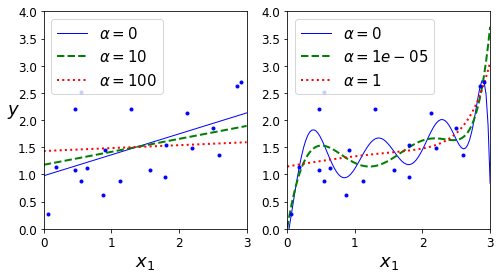

In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([ #PolynomialFeatures(degree=10) 데이터 확장
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()), #스케일 조정
                    ("regul_reg", model),
                ]) 
        model.fit(X, y) #릿지 모델 적용, 릿지 규제를 사용한 다항 회귀
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) #a를 증가시킬수록 직선에 가까워짐
plt.ylabel("$y$", rotation=0, fontsize=18) #모델의 분산은 줄지만 평향은 커지게 됨
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

#save_fig("ridge_regression_plot")
plt.show()

다양한 수준의 릿지 규제를 사용한 선형 회귀(왼쪽)과 다항 회귀(오른쪽)

 

**릿지 회귀의 정규방정식**
![ddsa](https://yganalyst.github.io/assets/images/ML/chap3/ridge3.png)

In [7]:
#정규방정식을 사용한 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [9]:
#확률적 경사 하강법을 사용한 릿지 회귀 적용
#기본값인 max_iter=1000과 tol=1e-3으로 지정
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42) #penalty
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

#### 라쏘 회귀
- 선형 회귀의 또 다른 규제된 버전
- 비용 함수에 규제항을 더함
- ![vv](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99B45E355C90F8532C)
-  특징
    -  덜 중요한 특성의 가중치를 제거함(즉, 가중치가 0이 됨)
    -  라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만듦

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


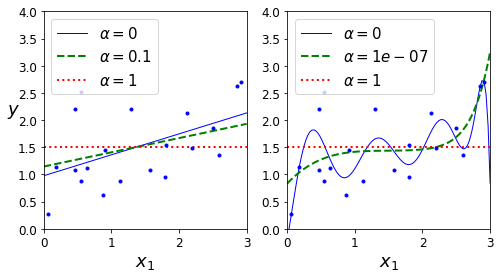

In [17]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

#|save_fig("lasso_regression_plot")
plt.show()

- 릿지 모델 대힌 라쏘 모델 + 조금 더 작은 a 값 사용
- 다양한 수준의 라쏘 규제를 사용한 선형 회귀(왼쪽)와 다항 회귀(오른쪽)

In [27]:
#라쏘 vs 릿지 규제
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [28]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

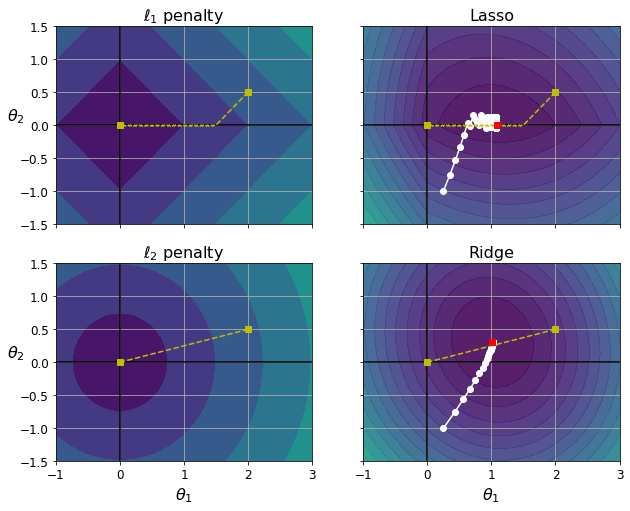

In [30]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

#save_fig("lasso_vs_ridge_plot")
plt.show()

In [18]:
#Lasso 클래스 사용 예제
#Lasso 대신 SGDRegressor(penalty="l1") 사용 가능
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### 엘라스틱넷
- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 라쏘 회귀와 릿지 회귀의 최적화 지점이 서로 다르기 때문에 두 정규화 항을 합쳐서 r 로 규제정도 조절
- ![sda](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFDF355C90F8532C)
- r=0: 릿지 회귀, r=1: 라쏘 회귀

In [19]:
#엘라스틱넷
#혼합 비율 r
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

- 릿지를 기본으로 사용하지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷을 사용함
- 라쏘와 엘라스틱넷은 불필요한 특성의 가중치를 0으로 만들어 줌
- 특성의 수가 훈련 샘플의 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘보다는 엘라스틱넷 선호함

#### 조기 종료
- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 엘러가 최솟값에 도달하면 바로 훈련을 중지시키는 것


In [22]:
#조기 종료 예제
from sklearn.model_selection import train_test_split
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [24]:
from sklearn.metrics import mean_squared_error
from copy import deepcopy

#데이터 준비
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#arm_start=True: fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련 이어함 
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

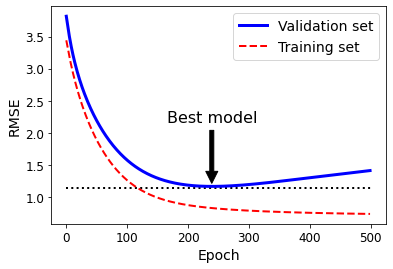

In [25]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

In [26]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

- 배치 경사 하강법으로 훈련시킨 복잡한 모델(고차원 다항 회귀 모델)
- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 감소함
- 그러나 감소하던 검증 에러가 다시 상승함 => 모델이 훈련 데이터에 과대적합
- 검증 에러가 최소에 도달하는 즉시 훈련을 멈춤

## 로지스틱 회귀
- 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨 Ex. 이 이메일이 스팸일 확률은 얼마인가?
- 이진 분류기
    - 추정 확률이 50% 이상(p>=50): 그 샘플이 해당 클래스에 속한다고 예측(레이블이 '1'인 양성 클래스)
    - 추청 확률이 50% 이하(p<50): 그 샘플이 해당 클래스에 속하지 않는다고 예측(레이블 '0'인 음성 클래스)
- 입력 특성의 가중치 합을 계산하고 편향을 더함

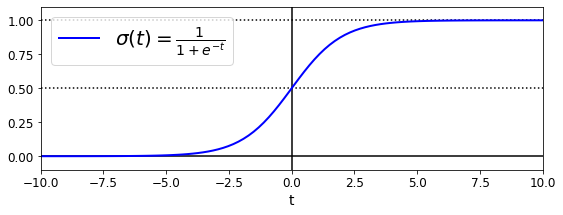

In [31]:
#로지스틱 함수
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()

#### 훈련과 비용 함수
- 훈련의 목적: 양성 샘플(y=1) -> 높은 확률을 추정, 음성 샘플(y=0) -> 낮은 확률을 추정
- 하나의 훈련 샘플에 대한 비용 함수
    ![asd](https://render.githubusercontent.com/render/math?math=c%28%5Cboldsymbol%7B%5Ctheta%7D%29%20%3D%0A%5Cbegin%7Bcases%7D%0A%20%20-%5Clog%28%5Chat%7Bp%7D%29%20%26amp%3B%20%5Ctext%7Bif%20%7D%20y%20%3D%201%2C%20%5C%5C%0A%20%20-%5Clog%281%20-%20%5Chat%7Bp%7D%29%20%26amp%3B%20%5Ctext%7Bif%20%7D%20y%20%3D%200.%0A%5Cend%7Bcases%7D&mode=inline)

**로그 손실**
- 전체 훈련 세트에 대한 비용 함수로 모든 훈련 샘플의 비용을 평균함
- ![asd](https://lh3.googleusercontent.com/proxy/GKLXZr2Oe-LLq0HbbKKYXuW6zgsXpGaxe-TQgLvsOA9hvl0IBdXsTa1EpHWNutlsgC89wH5ZxmlR4U8X34GSRlMozxJZ7blhyfc9h3pCAySr_vSJpg)

**편도 함수**
- ![sadw](https://yganalyst.github.io/assets/images/ML/chap3/logistic6.png)
- 모든 편도 함수를 포함한 그레이디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있음

In [37]:
#### 결정 경계
#로지스틱 회귀
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
print(iris.feature_names) #특성 이름

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
print(iris.target_names) #레이블 이름

['setosa' 'versicolor' 'virginica']


붓꽃 데이터셋
- 3개의 품종: 'setosa' 'versicolor' 'virginica'
- 붓꽃 150개의 꽃잎(petal)과 꽃받침(sepal)의 너비와 길이

In [40]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [41]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
#꽆잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 만들기
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0

In [43]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

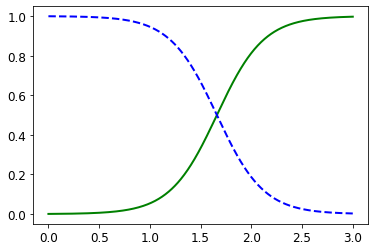

In [44]:
#꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


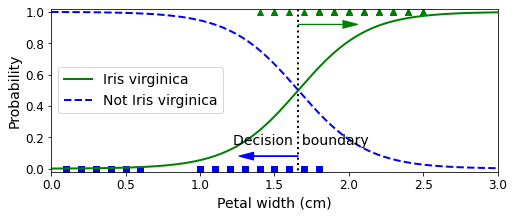

In [45]:
#책에 실린 그림.ver
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

In [46]:
decision_boundary

array([1.66066066])

In [47]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

- Iris-Verginica(▲)의 꽃잎 너비는 1.4~2.5cm에 분포
- 다른 붓꽃(■)은 일반적으로 꽃잎 너비가 더 작아 0.1~1.8cm에 분포
- 이 두 극단 사이에서는 분류가 확실하지 않음
- 양쪽 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어짐
- 따라서 꽃잎의 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측

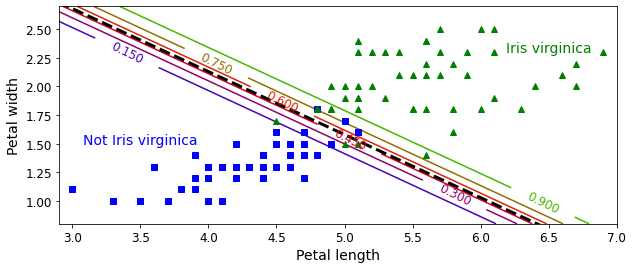

In [48]:
#꽃잎 너비와 꽃잎 길이 두 개의 특성
#훈련이 끝나면 로지스틱 회귀 분류기가 두 특성을 기반으로 하여 새로운 꽃이 Iris-Vwerginica인지  확률 추정
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

- 선형의 결정 경계(=점선)
- 점선은 모델이 50% 확률을 추정하는 지점
- 모델은 직선을 넘어서 있는 꽃들을 Iris-verginica로 예측

#### 소프트맥스 회귀
- 다항 로지스틱 회귀
- 여러개의 이진 분류기를 훈련 후, 연결하지 않고 직접 다중 클래스를 지원하도록 일반화 
- 샘플 X가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에대한 점수 s_k(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 범주별 속할 확률을 추정
- 범주 k에 대한 점수 s_k(x)
    ![sda](https://yganalyst.github.io/assets/images/ML/chap3/logistic7.png)
- 소프트맥스 함수
    ![wqwe](https://yganalyst.github.io/assets/images/ML/chap3/logistic8.png)
    - k : 범주의 수
    - s(x) : 샘플 x에 대한 각 범주의 점수를 담고 있는 벡터
    - σ(s(x))k : 이 샘플이 범주 k에 속할 확률
- 소프트맥스 회귀 분류기의 예측
    ![faw](https://yganalyst.github.io/assets/images/ML/chap3/logistic9.png)
    - 추정확률 σ(s(x))k가 최대인 k값을 반환
    
- 크로스 엔트로피 비용 함수
    ![dowa](https://yganalyst.github.io/assets/images/ML/chap3/logistic10.png)
    - 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지  측정하는 용도
    - i번째 샘플에 대한 타깃 범주가 k일때, y(i)k가 1이고, 그 외에는 0
    
- 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터
    ![qwewqw](https://yganalyst.github.io/assets/images/ML/chap3/logistic11.png)
    - 비용 함수를 최소화하기 위한 파라미터 행렬을 핮기 위해 경사 하강법 사용 가능

In [51]:
#붓꽃을 세 개의 클래스로 분류하기
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

#LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략 사용
#multi_class="multinomial" 로 옵션을 바꾸면 소프트맥스 회귀 사용
#solver="lbfgs" : 소프트맥스 회귀를 지원하는 알고리즘 지정
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [53]:
####위 분류기를 이용한 분류 예제
#꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃 예측 클래스
softmax_reg.predict([[5, 2]])

array([2])

- 클래스 2 = Iris-Verginica

In [52]:
#꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃의 각 클래스별 예측 확률
softmax_reg.predict_proba([[5, 2]]) 

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

- 2번째 클래스(Iris-Verginica)의 확률이 가장 높음 94.2%의 확률
- 1번째 클래스(Iris-Versicolor)는 5.8% 확률

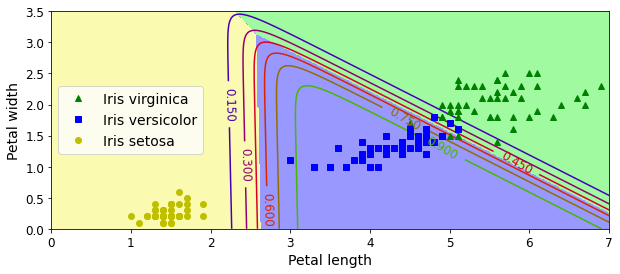

In [55]:
#붓꽃 - 3가지 클래스 분류
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

- 결정 경계: 배경색 구분 
- 추정 확률이 50%이하인 클래스도 예측하고 있음
- 클래스 사이의 결정 경계가 모두 선형의 형태